In [ ]:
pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 2.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn import svm
from sklearn.metrics import classification_report

import numpy as np
import seaborn as sns
import csv
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.model_selection import train_test_split


In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('indonesian'))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/GEMASTIK -DATMIN/data_cleaned.csv', sep=',')
data.head(5)

,content,reaksi
0,akun gopay saya di blok,Negatif
1,Lambat sekali sekarang ini bosssku apk gojek g...,Negatif
2,Kenapa sih dari kemarin sy buka aplikasi gojek...,Positif
3,Baru download gojek dan hape baru trus ditop u...,Negatif
4,Mantap,Positif


In [ ]:
data['reaksi'].value_counts()

reaksi
Positif    6787
Negatif    3211
Name: count, dtype: int64

<Axes: xlabel='reaksi'>

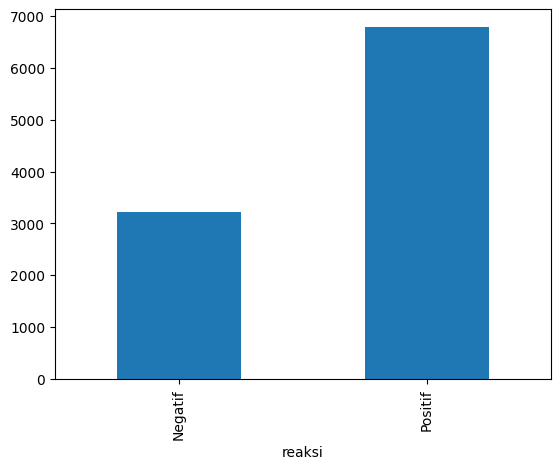

In [ ]:
data.groupby('reaksi').size().plot(kind='bar')

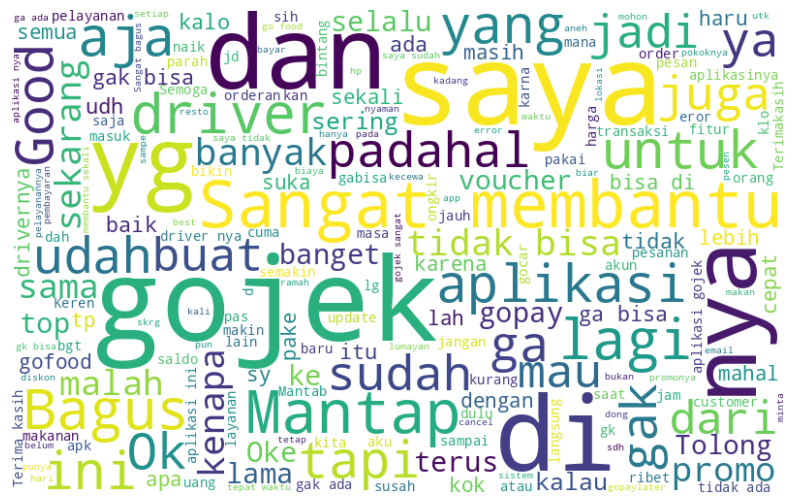

In [ ]:
# Sentimen yang ada pada seluruh data dapat dilihat dengan memahami kata yang umum dengan plot word cloud

def wordCloud(words):
    wordCloud = WordCloud(width=800, height=500, background_color='white', random_state=21, max_font_size=120).generate(words)

    plt.figure(figsize=(10, 7))
    plt.imshow(wordCloud, interpolation='bilinear')
    plt.axis('off')

all_words = ' '.join([text for text in data['content']])
wordCloud(all_words)

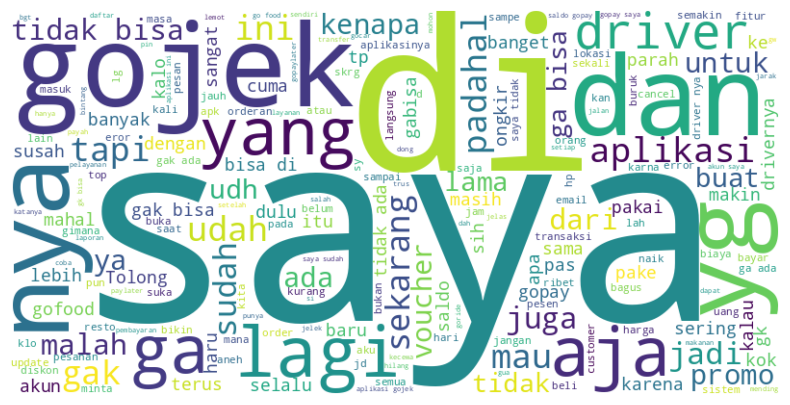

In [ ]:
# Melihat kata-kata yang negatif
negative_words = ' '.join(text for text in data['content'][data['reaksi'] == 'Negatif'])

# Membuat Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_words)

# Menampilkan Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# Memisahkan fitur (teks) dan label
content = data['content']
reaksi = data['reaksi']

# Membagi dataset menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(content, reaksi, test_size=0.2, random_state=42)

# Melakukan vektorisasi untuk mengekstrak fitur dengan TF-IDF
vectorizer = TfidfVectorizer(min_df=5, max_df=0.9, sublinear_tf=True, use_idf=True)

# Vektorisasi teks
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)
# Vektorisasi teks menggunakan CountVectorizer

In [ ]:
# Menampilkan shape dari setiap bagian data setelah vektorisasi
print("Shape of X_train_vectorized:", X_train_vectorized.shape)
print("Shape of X_test_vectorized:", X_test_vectorized.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train_vectorized: (7998, 1418)
Shape of X_test_vectorized: (2000, 1418)
Shape of y_train: (7998,)
Shape of y_test: (2000,)


In [ ]:
# Melakukan klasifikasi dengan SVM, kernel=linear
classifier_linear = svm.SVC(kernel='linear')
classifier_linear.fit(X_train_vectorized, y_train)

SVC(kernel='linear')

In [ ]:
# Prediksi pada data test
y_pred = classifier_linear.predict(X_test_vectorized)

In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

     Negatif       0.83      0.85      0.84       613
     Positif       0.93      0.92      0.93      1387

    accuracy                           0.90      2000
   macro avg       0.88      0.89      0.88      2000
weighted avg       0.90      0.90      0.90      2000



In [ ]:
teks = """gojeknya cepat datang"""
teks_vector = vectorizer.transform([teks]) # vectorizing
print(classifier_linear.predict(teks_vector))

['Positif']
